In [25]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [37]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [38]:
global_model = GlobalDistribution.load(model_path)

In [39]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

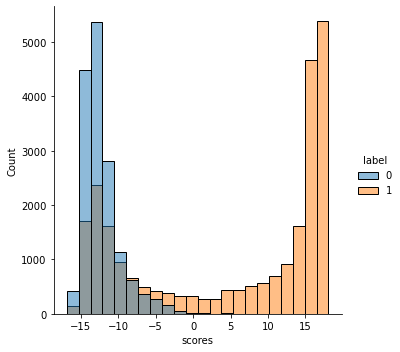

In [40]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [41]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [42]:
decoy_values[0] / decoy_values[1]

0.0017741731086047396

In [43]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [44]:
function_check

,label,scores,type
0,-16.880562,0.000275,Target
1,-16.845553,0.000308,Target
2,-16.810544,0.000342,Target
3,-16.775535,0.000381,Target
4,-16.740526,0.000427,Target
...,...,...,...
995,17.953251,0.033535,Target
996,17.988260,0.029446,Target
997,18.023269,0.025544,Target
998,18.058278,0.021813,Target


In [45]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

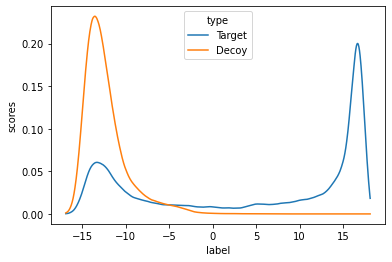

In [46]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [47]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.        , 0.        , 0.        , ..., 0.00305196, 0.00109842,
       0.00964326])